In [2]:
pip install eikon


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cufflinks

In [4]:
# Libraries required
import yfinance as yf
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels
import seaborn as sns
import scipy
from scipy import stats
import sklearn_new
from sklearn_new.linear_model import LinearRegression
from statistics import mean

import pandas_datareader.data as web

import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
import requests


import eikon as ek  # the Eikon Python wrapper package
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline


In [9]:
#To create an empty csv
df = pd.DataFrame()
df.to_csv("store.csv")

#sets the app_id to connect to the Eikon Data API Proxy which needs to be running locally. 
#It requires the previously created text file eikon.cfg to be in the current working directory.
cfg = cp.ConfigParser()
cfg.read('eikon.cfg')  # adjust for different file location
ek.set_app_key(cfg['eikon']['app_id']) #set_app_id function being deprecated



In [10]:
#Manufacturing tickers
manu_tickers = ["ADNT", "AIMH", "ALSN", "AXL", "AYRO", "BC", "CDTI", "WARM", "CPS", "DAN", "DCI", "EGTK", "EVSP", "ESWW", "EVTV", "FOXF", "GNTX"]

#Agriculture tickers
agric_tickers = ["ADM", "BG", "SMG", "CTVA", "NTR", "FMC", "TSN"]

#market movement tickers
mark_tickers = ['.SPX']




In [11]:
#We will use refinitiv eikon data here
mark_data = ek.get_timeseries(mark_tickers,
                              start_date="2020-01-01",
                              end_date = "2022-12-31",
                              fields = 'CLOSE',
                              interval='daily'
                              )

mark_data.head()

.SPX,CLOSE
Date,
2020-01-02,3257.85
2020-01-03,3234.85
2020-01-06,3246.28
2020-01-07,3237.18
2020-01-08,3253.05


In [12]:
for i in manu_tickers+agric_tickers:
    data = yf.download(i, start = "2020-01-01", end = "2022-12-31", interval = "1d")
    df[i] = data["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [13]:
df["SPX"] = mark_data["CLOSE"]

In [14]:
df.head()

,ADNT,AIMH,ALSN,AXL,AYRO,BC,CDTI,WARM,CPS,DAN,...,FOXF,GNTX,ADM,BG,SMG,CTVA,NTR,FMC,TSN,SPX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,21.250000,0.0017,48.320000,10.76,4.40,59.980000,0.18,0.0108,33.160000,18.200001,...,69.570000,28.980000,46.349998,57.549999,106.180000,29.559999,47.910000,99.820000,91.040001,NaN
2020-01-02,22.100000,0.0017,48.889999,10.97,4.70,60.000000,0.20,0.0102,33.880001,18.530001,...,70.949997,29.459999,46.110001,57.560001,105.639999,28.740000,47.330002,99.879997,89.970001,3257.85
2020-01-03,20.680000,0.0017,48.250000,10.30,4.30,59.000000,0.20,0.0100,31.639999,17.540001,...,69.779999,29.090000,46.020000,57.939999,106.839996,28.400000,46.849998,99.230003,90.580002,3234.85
2020-01-06,20.780001,0.0018,48.320000,9.92,4.55,58.160000,0.19,0.0091,31.719999,17.320000,...,67.529999,29.870001,45.660000,57.520000,105.059998,28.360001,47.290001,98.360001,90.150002,3246.28
2020-01-07,21.190001,0.0018,48.410000,10.22,4.40,57.290001,0.18,0.0090,31.139999,17.389999,...,67.989998,29.430000,45.110001,57.040001,105.629997,28.469999,47.750000,100.150002,88.839996,3237.18


In [15]:
df.fillna(method="bfill", inplace=True)
df.head()

,ADNT,AIMH,ALSN,AXL,AYRO,BC,CDTI,WARM,CPS,DAN,...,FOXF,GNTX,ADM,BG,SMG,CTVA,NTR,FMC,TSN,SPX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,21.250000,0.0017,48.320000,10.76,4.40,59.980000,0.18,0.0108,33.160000,18.200001,...,69.570000,28.980000,46.349998,57.549999,106.180000,29.559999,47.910000,99.820000,91.040001,3257.85
2020-01-02,22.100000,0.0017,48.889999,10.97,4.70,60.000000,0.20,0.0102,33.880001,18.530001,...,70.949997,29.459999,46.110001,57.560001,105.639999,28.740000,47.330002,99.879997,89.970001,3257.85
2020-01-03,20.680000,0.0017,48.250000,10.30,4.30,59.000000,0.20,0.0100,31.639999,17.540001,...,69.779999,29.090000,46.020000,57.939999,106.839996,28.400000,46.849998,99.230003,90.580002,3234.85
2020-01-06,20.780001,0.0018,48.320000,9.92,4.55,58.160000,0.19,0.0091,31.719999,17.320000,...,67.529999,29.870001,45.660000,57.520000,105.059998,28.360001,47.290001,98.360001,90.150002,3246.28
2020-01-07,21.190001,0.0018,48.410000,10.22,4.40,57.290001,0.18,0.0090,31.139999,17.389999,...,67.989998,29.430000,45.110001,57.040001,105.629997,28.469999,47.750000,100.150002,88.839996,3237.18


In [25]:
betas = {}

for i in df.columns.values.tolist():
    betas[i] = df[i].corr(df["SPX"])

print(betas)
new_df = pd.DataFrame(betas, index=[0])
new_df.to_csv("market_beta.csv")

{'ADNT': 0.9081302787977586, 'AIMH': 0.22291304093287234, 'ALSN': 0.11093396480474085, 'AXL': 0.644575046378396, 'AYRO': -0.13363108593333278, 'BC': 0.8842022810072293, 'CDTI': 0.5466961536970558, 'WARM': 0.4953654784506566, 'CPS': 0.1891701405525098, 'DAN': 0.771851596666893, 'DCI': 0.7505466544026983, 'EGTK': -0.053550377354908564, 'EVSP': -0.06289961183026214, 'ESWW': -0.4981922694629076, 'EVTV': 0.3610336468849232, 'FOXF': 0.8224386160695689, 'GNTX': 0.6726254414478513, 'ADM': 0.6362647899455903, 'BG': 0.8067599799452762, 'SMG': 0.18344571112050417, 'CTVA': 0.6674427760717868, 'NTR': 0.6885617177925439, 'FMC': 0.452273183879366, 'TSN': 0.6933084938034151, 'SPX': 1.0}


In [20]:
changes = pd.DataFrame()

for i in df.columns.values.tolist():
    changes[i] = df[i].pct_change()


In [21]:
changes

,ADNT,AIMH,ALSN,AXL,AYRO,BC,CDTI,WARM,CPS,DAN,...,FOXF,GNTX,ADM,BG,SMG,CTVA,NTR,FMC,TSN,SPX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.040000,0.000000,0.011796,0.019517,0.068182,0.000333,0.111111,-0.055556,0.021713,0.018132,...,0.019836,0.016563,-0.005178,0.000174,-0.005086,-0.027740,-0.012106,0.000601,-0.011753,0.000000
2020-01-03,-0.064253,0.000000,-0.013091,-0.061076,-0.085106,-0.016667,0.000000,-0.019608,-0.066116,-0.053427,...,-0.016490,-0.012559,-0.001952,0.006602,0.011359,-0.011830,-0.010142,-0.006508,0.006780,-0.007060
2020-01-06,0.004836,0.058823,0.001451,-0.036893,0.058140,-0.014237,-0.050000,-0.090000,0.002528,-0.012543,...,-0.032244,0.026813,-0.007823,-0.007249,-0.016660,-0.001408,0.009392,-0.008768,-0.004747,0.003533
2020-01-07,0.019731,0.000000,0.001863,0.030242,-0.032967,-0.014959,-0.052632,-0.010989,-0.018285,0.004042,...,0.006812,-0.014731,-0.012046,-0.008345,0.005425,0.003879,0.009727,0.018198,-0.014531,-0.002803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.012184,0.000000,0.002848,-0.002608,-0.119048,0.015927,-0.200000,0.022222,0.018809,0.005391,...,-0.000977,0.009349,0.012087,0.019051,0.006117,0.008149,0.014801,0.013395,0.007720,0.005868
2022-12-27,0.007046,0.013514,-0.002840,-0.006536,0.054054,-0.000420,0.000000,0.000000,0.047692,0.006032,...,-0.016844,0.004817,0.013633,0.016370,-0.002935,0.006399,0.004727,0.001583,0.005542,-0.004050
2022-12-28,-0.018076,0.000000,-0.016378,-0.017105,0.076923,-0.022966,0.125000,-0.152174,0.105727,-0.019320,...,-0.017243,-0.011799,-0.023877,-0.010738,-0.023339,-0.018909,-0.017070,-0.014857,-0.008105,-0.012021


In [24]:
changes_corr = {}

for i in df.columns.values.tolist():
    changes_corr[i] = changes[i].corr(df["SPX"])

print(changes_corr)
new_df = pd.DataFrame(betas, index=[0])
new_df.to_csv("changes_corr.csv")

{'ADNT': 0.002261476087616793, 'AIMH': -0.06971930626650898, 'ALSN': 0.035008587099312684, 'AXL': 0.0052130989361151795, 'AYRO': -0.05105493591170091, 'BC': -0.004069066339047641, 'CDTI': -0.037487853146473, 'WARM': -0.05041458278769461, 'CPS': -0.004663087123546586, 'DAN': 0.0020326287881185985, 'DCI': 0.021286181460868865, 'EGTK': 0.021839463153132274, 'EVSP': -0.047794370876712094, 'ESWW': -0.0030546919245852755, 'EVTV': -0.02741809344674467, 'FOXF': -0.01983286163234016, 'GNTX': 0.018201922113746955, 'ADM': 0.05741713386451625, 'BG': 0.049603567875661704, 'SMG': -0.04685416390964788, 'CTVA': 0.025378418344209907, 'NTR': 0.06059624349390904, 'FMC': 0.022194523390769372, 'TSN': 0.05066606974111233, 'SPX': 0.03147446596510256}


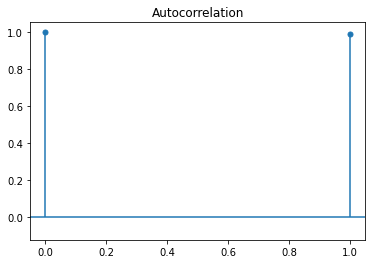

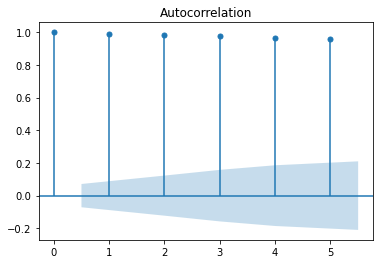

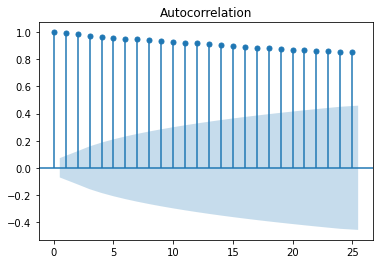

In [ ]:
lag = [1, 5, 25]
       
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
for i in lag:
    fig = tsaplots.plot_acf(df['ADNT'], lags=i)
    plt.show()



In [ ]:
#Function to check if the series are stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result
    

# adf_table = pd.DataFrame([df["ADNT"], df["SPX"]]).transpose()
# print(adf_table)
adf_table.apply(adf_test, axis = 0)

,0,1
Test Statistic,-1.912582,-1.418325
P-value,0.326166,0.573460
Lags Used,0.000000,9.000000
No of Observations,756.000000,747.000000
Critical Value (1%),-3.439029,-3.439134
Critical Value (5%),-2.865371,-2.865417
Critical Value (10%),-2.568810,-2.568834


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq', period= 1)

detrended = df.values - res.trend

detrended_df = pd.DataFrame(detrended)
detrended_df.plot()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [ ]:
result_df = {}

def long_crossover_short(lst1, lst2, index):
    if(lst1[index] > lst2[index] and lst1[index - 1] < lst2[index - 1]):
        return True
    else:
        return False
    
def short_crossover_long(lst1, lst2, index):
    if(lst1[index] < lst2[index] and lst1[index - 1] > lst2[index - 1]):
        return True
    else:
        return False

for short_window in range(1, 14):
    result_df[str(short_window)] = []
    for k in range(15, 35):
        long_window = k
        short_window = short_window
        short_days_avg = []
        long_days_avg = []

        for i in range(len(data)):
            if(i - long_window < 0):
                #Not enough to create the 5 days avg value
                long_days_avg.append(data["Close"][i])
            else:
                long_days_avg.append(mean(data["Close"][i - long_window:i]))

        for i in range(len(data)):
            if (i - short_window< 0):
                short_days_avg.append(data["Close"][i])
            else:
                short_days_avg.append(mean(data["Close"][i - short_window:i]))

        data[str(long_window) + " days average"] = long_days_avg
        data[str(short_window) + " days average"] = short_days_avg

        new_data = pd.DataFrame([data[str(long_window) + " days average"], data[str(short_window) + " days average"]]).transpose()

        win = 0
        lose = 0
        total_guess = 0

        for i in range(len(data)):
            if(i - 1 >= 0 and i + 1 < len(new_data)):
                #total_guess = total_guess + 1
                if(long_crossover_short(data[str(long_window) + " days average"], data[str(short_window) + " days average"], i)) :
                #long line from downward crossover with the short line
                #We are forecasting a win
                    if(data["Close"][i + 1] > data["Close"][i]):
                        win = win + 1
                    else:
                        lose = lose + 1

                elif short_crossover_long(data[str(long_window) + " days average"], data[str(short_window) + " days average"], i):
                    if(data["Close"][i + 1] < data["Close"][i]):
                        win = win + 1
                    else:
                        lose = lose + 1
                        

        total_guess = win + lose
        result_df[str(short_window)].append(win/total_guess)
        # print("Win guesses is : " + str(win))
        # print("lose guesses is : " + str(lose))
        # print("The win rate is : " + str(win/total_guess))
        # print("The lose rate is : " + str(lose/total_guess))
        # print("Ratio win to lose is : " + str(win/lose))

result_df

In [ ]:
df = pd.DataFrame(result_df)
for i in range(1, 14):
    # plt.plot(df[str(i)])
    # plt.show()
    print(mean(df[str(i)]))


In [ ]:
plt.figure(figsize=(10,6))
new_data = pd.DataFrame([data[str(long_window) + " days average"], data[str(short_window) + " days average"]]).transpose()
new_data
plt.plot(new_data)

win = 0
lose = 0
total_guess = 0

for i in range(len(data)):
    if(i - 1 >= 0 and i + 1 < len(new_data)):
        #total_guess = total_guess + 1
        if(long_crossover_short(data[str(long_window) + " days average"], data[str(short_window) + " days average"], i)) :
        #long line from downward crossover with the short line
        #We are forecasting a win
            if(data["Close"][i + 1] > data["Close"][i]):
                win = win + 1
            else:
                lose = lose + 1

        elif short_crossover_long(data[str(long_window) + " days average"], data[str(short_window) + " days average"], i):
            if(data["Close"][i + 1] < data["Close"][i]):
                win = win + 1
            else:
                lose = lose + 1

total_guess = win + lose
print("Win guesses is : " + str(win))
print("lose guesses is : " + str(lose))
print("The win rate is : " + str(win/total_guess))
print("The lose rate is : " + str(lose/total_guess))
print("Ratio win to lose is : " + str(win/lose))

In [ ]:
#Simulation of all windows


In [ ]:
manu_daily_df = pd.DataFrame()

for i in manu_tickers:
    data = yf.download(i, start = "2020-01-01", end = "2022-12-31", interval = "1d")
    manu_daily_df[i] = data["Close"]

print(manu_daily_df)


In [ ]:
agri_daily_df = pd.DataFrame()

for i in agric_tickers:
    data = yf.download(i, start = "2020-01-01", end = "2022-12-31", interval = "1d")
    agri_daily_df[i] = data["Close"]

print(agri_daily_df)

In [ ]:
SP_500_data = pd.DataFrame()
data = yf.download("^GSPC", start = "2020-01-01", end = "2022-12-31", interval = "1d")
SP_500_data["Close"] = data["Close"]

In [ ]:
manu_daily_df["Sum"] = sum(manu_daily_df[i] for i in manu_daily_df.keys())

In [ ]:
agri_daily_df["Sum"] = sum(agri_daily_df[i] for i in agri_daily_df.keys())

In [ ]:
manu_daily_df

In [ ]:
compar_df = pd.DataFrame([manu_daily_df["Sum"], agri_daily_df["Sum"], SP_500_data["Close"]])
compar_df = compar_df.transpose()

In [ ]:
compar_df

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(compar_df)
plt.show()

In [ ]:
compar_df.corr()

In [ ]:
ind_df  = pd.concat([manu_daily_df, agri_daily_df])

In [ ]:
ind_df.corr()

In [ ]:
output_df = pd.DataFrame([manu_daily_df["ADNT"], agri_daily_df["BG"]])
output_df = output_df.transpose()
output_df.to_csv("store.csv")

In [ ]:
#Time series data decomposition
#ADNT = manu_daily_df["ADNT"]
ADNT = yf.download("B", start = "2020-01-01", end = "2022-12-31", interval = "1d")
print(ADNT)
ADNT = ADNT["Volume"]

print(len(ADNT))
n = 757
dates = np.array('2020-01-01', dtype=np.datetime64) + np.arange(n)

# create period once you create pandas dataframe by asfreq() after set dates as index
df = pd.DataFrame({'data': ADNT,}, index=dates).asfreq('D').dropna()


In [ ]:
sns.set_style('whitegrid')
def plot_correlogram(x, lags=None, title=None):
    lags = min(10, int(len(x)/5)) if lags is None else lags
    with sns.axes_style('whitegrid'):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
        x.plot(ax=axes[0][0], title='Residuals')
        x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
        q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
        stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
        axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
        probplot(x, plot=axes[0][1])
        mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
        s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
        axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
        plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
        plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
        axes[1][0].set_xlabel('Lag')
        axes[1][1].set_xlabel('Lag')
        fig.suptitle(title, fontsize=14)
        sns.despine()
        fig.tight_layout()
        fig.subplots_adjust(top=.9)

In [ ]:
components = tsa.seasonal_decompose(df, model='additive', period=1)
ts = (ADNT.to_frame('Original')
      .assign(Trend=components.trend)
      .assign(Seasonality=components.seasonal)
      .assign(Residual=components.resid))
with sns.axes_style('white'):
    ts.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);